<a href="https://colab.research.google.com/github/Deanelle/World-Happiness-Statistical-Analysis-/blob/main/World_Happiness_Report_Expermental_Design_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction** 

---


The World Happiness Report up to 2020 is an interesting survey that looks at the state of worldwide happiness of 153 nations. 

Happiness is vital to living a long, prosperous life and I would like to focus on how social support plays a role in  healthy life expectancy because of how important it is for people to have a sense of belonging and camaraderie. 


**Hypothesis**

---

H_o: There is no statistically significant correlation between social support and healthy life expectancy in population. 

H_a: There is statistically significant correlation between social support and healthy life expectancy in population.

**Data**

---

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation addresses inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a 0 and to rate their  current lives on that scale. 
The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social support, healthy life expectacion, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in what would be considered a Dystopia. 
This file contains the Happiness Score for 153 countries and looks holistically at the other scores that influence that score which provides insights into what these countries are currently doing or need to do to help increase the happiness of its citizens. 
The Happiness Score is explained by the following factors: GDP per capita,  Healthy Life Expectancy, Social support, Freedom to make life choices, Generosity, Corruption Perception
The data comes from: 
https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv


In [ ]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

happiness = pd.read_csv('2020.csv')

# Convert column headers to lower case for ease of coding

happiness.columns = happiness.columns.str.lower()

print(happiness)
happiness.info()
happiness.head()

                 country name  ... dystopia + residual
0                     Finland  ...            2.762835
1                     Denmark  ...            2.432741
2                 Switzerland  ...            2.350267
3                     Iceland  ...            2.460688
4                      Norway  ...            2.168266
..                        ...  ...                 ...
148  Central African Republic  ...            2.860198
149                    Rwanda  ...            0.548445
150                  Zimbabwe  ...            0.841031
151               South Sudan  ...            1.378751
152               Afghanistan  ...            1.507236

[153 rows x 20 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country name                                153 non-null   

,country name,regional indicator,ladder score,standard error of ladder score,upperwhisker,lowerwhisker,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption,ladder score in dystopia,explained by: log gdp per capita,explained by: social support,explained by: healthy life expectancy,explained by: freedom to make life choices,explained by: generosity,explained by: perceptions of corruption,dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


**Research Design**

---


For this analysis, I will create two DataFrames, one containing all records for social support  and another for healthy life expectancy. 
I will conduct a Pearson correlation test to measure the strength and direction of the  relationship between the two variables, health life expectancy and social support. 


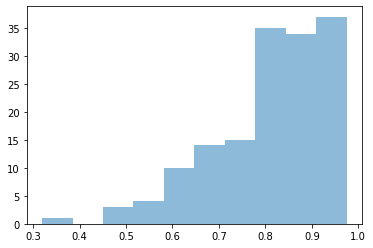

In [ ]:
#plot the histograms

plt.hist(happiness['social support'], alpha = .5)
plt.show()



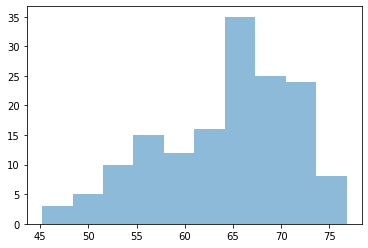

In [ ]:
plt.hist(happiness['healthy life expectancy'], alpha = .5)
plt.show()

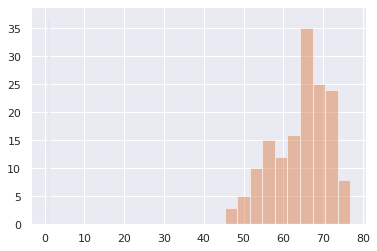

DescribeResult(nobs=153, minmax=(0.31945985600000004, 0.9746695759999999), mean=0.8087210684379086, variance=0.014750896171899059, skewness=-1.1543647176213423, kurtosis=1.2744239668666664)
DescribeResult(nobs=153, minmax=(45.20000076, 76.80458069), mean=64.44552916509804, variance=49.81321322904635, skewness=-0.5472861352879743, kurtosis=-0.523414031010978)


In [ ]:
plt.hist(happiness['social support'], alpha = .5)
plt.hist(happiness['healthy life expectancy'], alpha = .5)
plt.show()

print(stats.describe(happiness['social support']))
print(stats.describe(happiness['healthy life expectancy']))

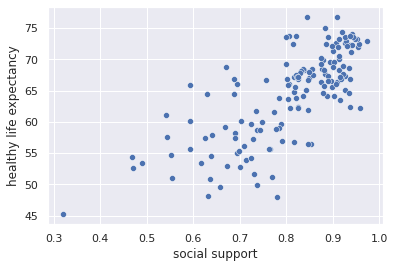

In [ ]:
#make a scatterplot 
#this shows the relationship between social support and healthy life expectancy better than the histograms
sns.scatterplot(x="social support", y="healthy life expectancy", data=happiness);

In [ ]:
happiness[['social support', 'healthy life expectancy']].describe()

,social support,healthy life expectancy
count,153.000000,153.000000
mean,0.808721,64.445529
std,0.121453,7.057848
min,0.319460,45.200001
25%,0.737217,58.961712
50%,0.829204,66.305145
75%,0.906747,69.289192
max,0.974670,76.804581


In [ ]:
stats.pearsonr(happiness['social support'], happiness['healthy life expectancy'])

(0.7427440895198049, 4.3086274863375165e-28)

In [ ]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(happiness['social support'], happiness['healthy life expectancy']))



The difference in means at the 95% confidence interval (two-tail) is between 62.5182799233889 and 64.75533626993143.


## 5. Results

Based on a visual inspection, social support and healty life expectancy have a strong postive correlation. The higher the social support, the higher the healthy life expectancy. The r-value being .743 shows this positve relationship. From this, you can expect a signifciant correlation between these two variables to generalize out to the population. 

Therefore since the p-value is less than 5% we can conclude that it is statistically significant , we can reject the null hypothesis H_o and accept the alternative hypothesis H_a.

The 95% confidence interval suggests that the difference in social support and healthy life expectancy is between 65 and 63. 



## 6. Discussion and recommendation

Social Support and Healthy life expectancy have a strong positive correlation. Which means that as perception of social support goes up so does the healthy life expectancy. Meaning that having a strong social support correlates to having a higher healthy life expectancy. 


This research has implicatons for stakeholders who work as policy makers to make decisions about social impacts on health  and why it is important to address the social needs of their constituents. Thus, helping governments to focus on cultivating a social environment that is suitable for encouraging the health and happiness of their nation. 


The question here though, is how does social support correlate with other variables like GDP or perecpetion of corruption or how does it relate to different groups in the population such as countries in a different geographical regions? Therefore, as a next step in the process, I will examine how social support and happiness differ based on geographical regions, then examine through A/B testing the results of how geography plays a role in happiness. 